In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch

from Get_Dataloaders import getDataloaders
from training_and_testing import train_models

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
train_path = os.getcwd() + '/{}'.format('storage/dataset/train')
test_path = os.getcwd() + '/{}'.format('storage/dataset/test')
train_loader, val_loader, test_loader = getDataloaders(train_path, test_path, train_batch_size=2)
dataloaders = {
    'training':train_loader,
    'validation':val_loader,
    'testing':test_loader
}

# Training Models

Epochs: [20]

Learning Rates: [0.001, 0.0005, 0.0001]

You will train 4 models!
Training model with 20 epochs and 0.001 learning rate
Epoch: 1	Training Loss: 0.4631539908392976	Validation Loss: 0.3306441182891528
Saving new model parameters for better validation performance
Epoch: 2	Training Loss: 0.2926921338463823	Validation Loss: 0.23197686423858008
Saving new model parameters for better validation performance
Epoch: 3	Training Loss: 0.27322322137964267	Validation Loss: 0.26262547230968875
Epoch: 4	Training Loss: 0.2633133187191561	Validation Loss: 0.24512029625475407
Epoch: 5	Training Loss: 0.2567202534992248	Validation Loss: 0.24925852349648872
Epoch: 6	Training Loss: 0.22080087277572602	Validation Loss: 0.21262679466356835
Saving new model parameters for better validation performance
Epoch: 7	Training Loss: 0.25184160144999623	Validation Loss: 0.2418278551970919
Epoch: 8	Training Loss: 0.2428039371346434	Validation Loss: 0.22183764663835367
Epoch: 9	Training Loss: 0.22703246399760246	Validation Loss: 0.21777435609449944
Epoch: 10	Tra

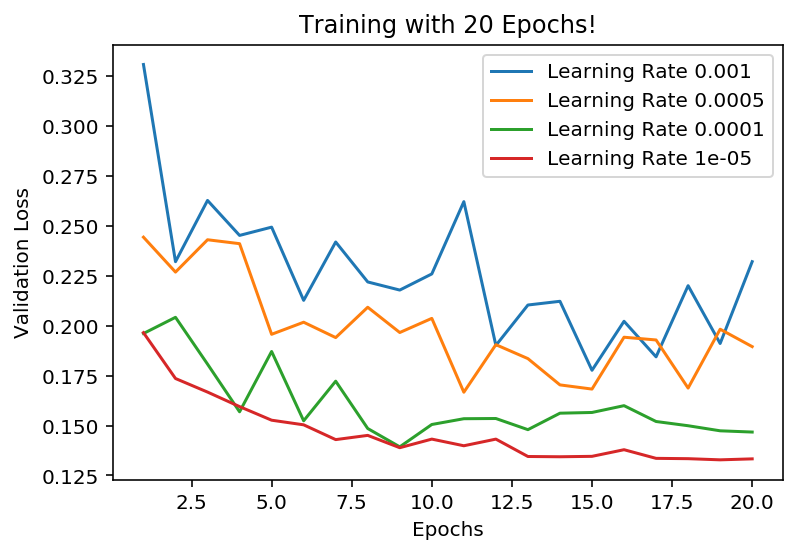



The Best Model is model_e(20)_lr(1e-05).pth with the lowest test loss of 0.1850173697496454!!!


In [6]:
epochs_list = [20]
learning_rates = [0.001, 0.0005, 0.0001, 0.00001]

# num_classes - number of classes + 1 (background)
num_classes= 3

save_path = '/notebooks/models'

train_models(dataloaders, epochs_list, learning_rates, num_classes, save_path, freeze_params=True)

# Loading Model with 20 epochs and 0.00001 learning rate

In [8]:
from Load_Model import load_model
save_path = '/notebooks/models/model_e(20)_lr(1e-05).pth'

# Moving model to CPU or GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

best_model = load_model(save_path, num_classes=3, device=device)

# Drawing Boxes on the testing images

In [9]:
from PIL import Image, ImageDraw
import torchvision.transforms.functional as F

def plot_boxes(images, outputs):
    drawn_images = []
    for i in range(len(images)):
        image = F.to_pil_image(images[i].cpu())
        img1 = ImageDraw.Draw(image)
        boxes = outputs[i]['boxes']
        labels = outputs[i]['labels']
        for j in range(len(boxes)):
            label = labels[j]
            box = list(boxes[j])
            
            if label == 1:
                # Red for apple
                img1.rectangle(box, outline='red')
            elif label == 2:
                # Yellow for banana
                img1.rectangle(box, outline='yellow')
            else:
                # Orange for orange
                img1.rectangle(box, outline='orange')
                
        drawn_images.append(image)
    
    if len(drawn_images) > 1:
        return drawn_images
    
    return drawn_images[0]

def testing_pic(model, idx, dataloaders, device):
    model.eval()
    images, targets = list(dataloaders['testing'])[idx]
    images = [image.to(device) for image in images]
    targets = [{'boxes':target['boxes'].to(device), 'labels':target['labels'].to(device)} for target in targets]
    outputs = best_model(images, targets)['detections']

    return plot_boxes(images, outputs)

/usr/local/lib/python3.6/dist-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


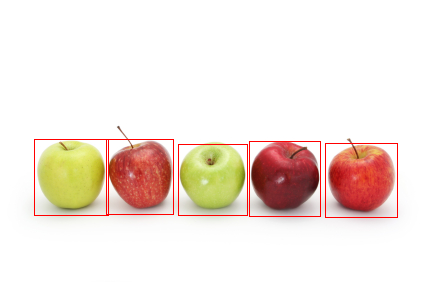

In [10]:
idx = 9
testing_pic(best_model, idx, dataloaders, device)

# Saving Samples

In [12]:
indices = np.random.permutation(60)[:10]
save_path = '/notebooks/samples'
for i in range(len(indices)):
    idx = indices[i]
    img = testing_pic(best_model, idx, dataloaders, device)
    filename = "sample_{}.jpg".format(i+1)
    img.save(os.path.join(save_path, filename))